## WK2 Participation

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt

In [2]:
# Load in the dataframe
df = pd.read_csv("covid19.csv", index_col=0)

In [3]:
# Looking at first 5 rows of the dataset
df.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
cord_uid,,,,,,,,,,,,,,,,
vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


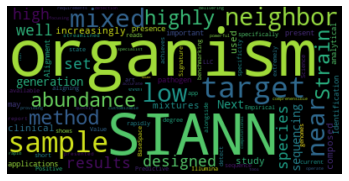

In [4]:
# Start with one review:
text = df.abstract[0] #first text

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
df2 = df.abstract
df2.shape

(45774,)

In [6]:
df2.head()

cord_uid
vho70jcx    Next-generation sequencing is increasingly bei...
i9tbix2v    An emerging disease is one infectious epidemic...
62gfisc6    Germline variation at immunoglobulin gene (IG)...
058r9486    Deep sequencing of clinical samples is now an ...
wich35l7    Developing methods to reconstruct transmission...
Name: abstract, dtype: object

In [7]:
df2 = df2.reset_index(drop = True)

In [8]:
df2.head()

0    Next-generation sequencing is increasingly bei...
1    An emerging disease is one infectious epidemic...
2    Germline variation at immunoglobulin gene (IG)...
3    Deep sequencing of clinical samples is now an ...
4    Developing methods to reconstruct transmission...
Name: abstract, dtype: object

In [9]:
text = " ".join(str(i) for i in df.abstract)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 51835076 words in the combination of all review.


In [10]:
from nltk.tokenize import RegexpTokenizer

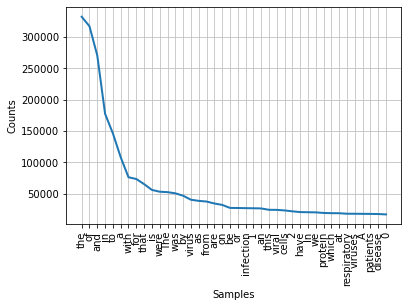

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(40)

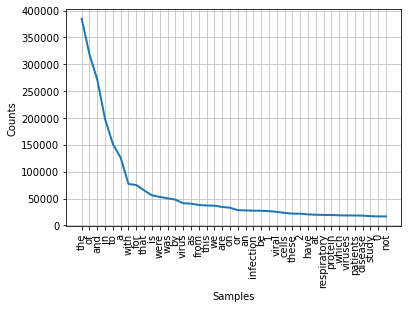

In [12]:
# Convert all text to lowercase
text = text.lower()
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(40)

In [13]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
for word in tokens[1:10]:
    print(word, ":", stemmer.stem(word))

generation : gener
sequencing : sequenc
is : is
increasingly : increasingli
being : be
used : use
to : to
study : studi
samples : sampl


In [14]:
#lemmatizations
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for word in tokens[1:100]:
    print(word, ":",lemmatizer.lemmatize(word))

generation : generation
sequencing : sequencing
is : is
increasingly : increasingly
being : being
used : used
to : to
study : study
samples : sample
composed : composed
of : of
mixtures : mixture
of : of
organisms : organism
such : such
as : a
in : in
clinical : clinical
applications : application
where : where
the : the
presence : presence
of : of
a : a
pathogen : pathogen
at : at
very : very
low : low
abundance : abundance
may : may
be : be
highly : highly
important : important
we : we
present : present
an : an
analytical : analytical
method : method
siann : siann
strain : strain
identification : identification
by : by
alignment : alignment
to : to
near : near
neighbors : neighbor
specifically : specifically
designed : designed
to : to
rapidly : rapidly
detect : detect
a : a
set : set
of : of
target : target
organisms : organism
in : in
mixed : mixed
samples : sample
that : that
achieves : achieves
a : a
high : high
degree : degree
of : of
species : specie
and : and
strain : strain
s

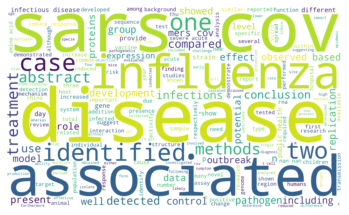

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["virus","viruses","infection","viral","cells", "protein", "respiratory", "patients","study","used","using","result","results","found","method","human","may"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 2000, height = 1200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
wine_mask = np.array(Image.open("winemask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [18]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [19]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

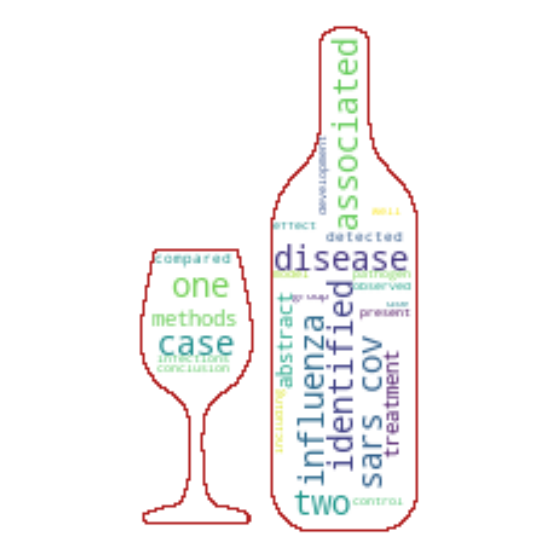

In [20]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()